# Wind Power Forecasting using Linear Regression and EDA (Exploratory Data Analysis)

# Aman Gupta

# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

!pip install lightgbm
from lightgbm import LGBMRegressor


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [4]:
import seaborn as sns

# 2) Reading the data

In [5]:
name = ['Time','ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature', 'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection']

df = pd.read_csv('Turbine_Data.csv',names = name, parse_dates = True, header = 0)

df['Time'] = pd.to_datetime(df.index, yearfirst = True,)

In [6]:
fiddler1 = pd.read_csv('Turbine_Data.csv', index_col=[0])

fiddler1.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [7]:
fiddler1.drop(columns = ['WTG','ControlBoxTemperature'], inplace = True)

fiddler1.index = pd.to_datetime(fiddler1.index)


In [8]:
fiddler1.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
intrap_df = pd.read_csv('Turbine_Data.csv', parse_dates = True, index_col = 0,header = 0)

intrap_df.drop(columns = ['WTG','ControlBoxTemperature'], inplace = True)

intrap_df.index = pd.to_datetime(fiddler1.index)



In [10]:
intrap_df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mode_df = intrap_df.copy()

forward_fill = intrap_df.copy()

# 3) Handling null values

In [12]:
fiddler1.info()
print('-'*30)

fiddler1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   94750 non-null  float64
 1   AmbientTemperatue             93817 non-null  float64
 2   BearingShaftTemperature       62518 non-null  float64
 3   Blade1PitchAngle              41996 non-null  float64
 4   Blade2PitchAngle              41891 non-null  float64
 5   Blade3PitchAngle              41891 non-null  float64
 6   GearboxBearingTemperature     62540 non-null  float64
 7   GearboxOilTemperature         62438 non-null  float64
 8   GeneratorRPM                  62295 non-null  float64
 9   GeneratorWinding1Temperature  62427 non-null  float64
 10  GeneratorWinding2Temperature  62449 non-null  float64
 11  HubTemperature                62406 non-null  float64
 12  MainBoxTempe

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

We can see that there are many missing values which would either need to be filled or removed. We can also infer that most of the columns are floats, so they dont need to be encoded anyhow. However WTG column, is of the object type, so we need to handle that as well.

In [13]:
target = ['ActivePower']

In [14]:
columns = ['AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,'Blade3PitchAngle','GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM','GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature','NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection','WindSpeed']


for n in columns:
    fiddler1[n].fillna(fiddler1[n].median(),inplace = True)
    intrap_df[n].fillna(intrap_df[n].mean(),inplace = True)
    mode_df[n].fillna(mode_df[n].mode(),inplace = True)
    


In [15]:
fiddler1.describe(datetime_is_numeric = True)

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,619.109805,28.685033,42.963394,3.717605,4.130284,4.130284,64.517005,57.388925,1112.828712,69.311673,68.608353,36.947947,39.521073,190.736734,77.758507,9.998225,1.214372e+03,190.736734,5.814764
std,611.275373,3.896064,4.032802,13.093631,12.834936,12.834936,7.610422,4.599345,383.486996,16.776437,16.810500,3.762904,4.168552,69.389261,106.441060,3.421776,2.615875e+05,69.389261,2.346292
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,26.350811,42.512424,0.394399,0.888977,0.888977,64.181922,56.876925,1095.351163,64.597785,63.796541,36.996185,39.157395,172.000000,-0.068410,9.850361,2.000000e+00,172.000000,4.285497
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,30.714347,43.291577,0.394399,0.888977,0.888977,65.446392,57.500770,1155.511885,67.010176,66.257863,37.312651,39.832760,195.500000,108.893640,10.362055,2.000000e+00,195.500000,6.930121
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [16]:
fiddler1.info()
print('-'*30)

fiddler1.isnull().sum()


intrap_df.isnull().sum()

mode_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             118224 non-null  float64
 2   BearingShaftTemperature       118224 non-null  float64
 3   Blade1PitchAngle              118224 non-null  float64
 4   Blade2PitchAngle              118224 non-null  float64
 5   Blade3PitchAngle              118224 non-null  float64
 6   GearboxBearingTemperature     118224 non-null  float64
 7   GearboxOilTemperature         118224 non-null  float64
 8   GeneratorRPM                  118224 non-null  float64
 9   GeneratorWinding1Temperature  118224 non-null  float64
 10  GeneratorWinding2Temperature  118224 non-null  float64
 11  HubTemperature                118224 non-null  float64
 12

We can see that after filling all the null values with it's median we were able to get rid of many of the empty columns. Now we have only 2 columns with null values. Every value in the ControlBoxTemperature column is 0 as we can see in the data, therefore we deem it to be redundant and drop it entirely. For the ActivePower we can drop all the rows with null values.

In [17]:
df_all = [fiddler1,intrap_df,forward_fill]

for df in df_all:
    df.dropna(axis=0,how = 'any',inplace = True)
    print(df.isnull().sum())



ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
dtype: int64
ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
G

As we can see, we have managed to get rid of all the null values, now let us perform EDA and then build a model. Since all the values are a number we dont need to perform  categorical imputation.

In [18]:
forward_fill.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,58.852308,56.782879,68.210284,62.792258,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,44.80,2.212693
2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,48.911180,56.033333,68.229411,61.747975,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,49.00,2.130019
2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,56.859428,55.873937,85.012009,60.785716,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,61.50,2.347810
2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,56.761226,55.807661,63.945036,60.277575,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,93.25,2.161460
2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,56.483241,55.451512,21.339981,60.004809,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,138.50,1.913490


# 4) Performing EDA

In [19]:
pd.unique(list(fiddler1.index.year))

array([2018, 2019, 2020])

We will now extract the month and the year from the index, and create two new columns.

In [20]:
fiddler1['Year'] = fiddler1.index.year
fiddler1['month'] = fiddler1.index.month
fiddler1['hour'] = fiddler1.index.hour

In [21]:
fiddler1.loc['2018']

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Year,month,hour
2018-01-01 00:00:00+00:00,-5.357727,23.148729,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.86072,65.788800,...,39.491310,8.000000,-9.960830,10.098702,2.0,8.000000,2.279088,2018,1,0
2018-01-01 00:10:00+00:00,-5.822360,23.039754,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.86072,65.788800,...,39.491310,300.428571,-9.628441,10.098702,2.0,300.428571,2.339343,2018,1,0
2018-01-01 00:20:00+00:00,-5.279409,22.948703,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.86072,65.788800,...,39.491310,340.000000,-9.491235,10.098702,2.0,340.000000,2.455610,2018,1,0
2018-01-01 00:30:00+00:00,-4.648054,22.966851,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.86072,65.788800,...,39.491310,345.000000,-9.856136,10.098702,2.0,345.000000,2.026754,2018,1,0
2018-01-01 00:40:00+00:00,-4.684632,22.936520,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.86072,65.788800,...,39.491310,345.000000,-9.745593,10.098702,2.0,345.000000,1.831420,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00+00:00,460.159960,19.719615,40.772233,0.394399,0.888977,0.888977,63.593708,55.043968,1135.70637,62.654735,...,28.475159,182.000000,0.045414,10.187030,2.0,182.000000,6.283785,2018,12,23
2018-12-31 23:20:00+00:00,475.524052,19.688788,40.451355,0.394399,0.888977,0.888977,64.819691,55.263293,1147.05191,61.479936,...,28.600000,200.000000,-0.077138,10.283591,2.0,200.000000,5.944285,2018,12,23
2018-12-31 23:30:00+00:00,463.886264,19.619373,40.232792,0.394399,0.888977,0.888977,65.349617,55.556396,1142.78669,60.812049,...,28.680973,182.000000,0.071383,10.256173,2.0,182.000000,5.951235,2018,12,23
2018-12-31 23:40:00+00:00,456.382545,19.580122,40.031861,0.394399,0.888977,0.888977,65.379089,55.679882,1132.42651,60.096106,...,28.718990,182.000000,-0.148270,10.159425,2.0,182.000000,6.269970,2018,12,23


# 5) Visualization

Using the heatmap function provided by the seaborn library 

<AxesSubplot:>

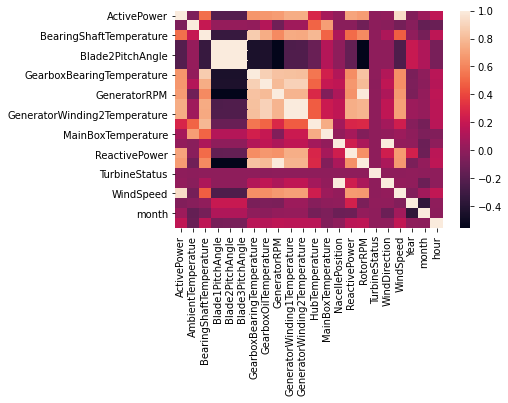

In [22]:
sns.heatmap(fiddler1.corr())

<AxesSubplot:>

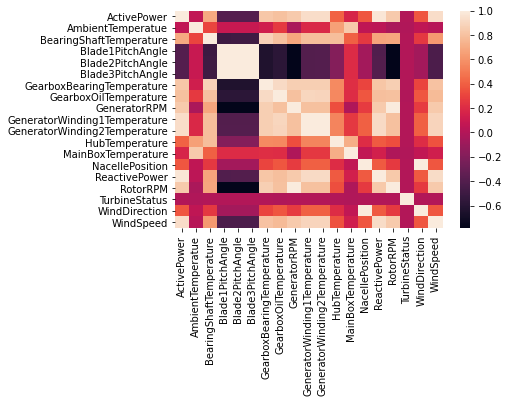

In [23]:
sns.heatmap(forward_fill.corr())

# 6) Building a model

In [24]:
column = ['AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,'Blade3PitchAngle','GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM','GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature','NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection']

In [25]:
x_median = forward_fill[columns]

y_median = forward_fill[target]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV


    

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_median,y_median,test_size=0.3, random_state=1)


cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [28]:
x_train

,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2019-06-17 01:40:00+00:00,27.873693,44.340168,0.593200,1.148325,1.148325,68.947325,65.608987,1687.216889,109.554383,109.006105,37.336724,36.674173,342.0,315.911110,15.143985,2.0,342.0,8.686966
2020-03-16 16:20:00+00:00,28.815073,50.871836,1.308152,1.968543,1.968543,74.644536,63.379204,1733.717210,104.954821,104.470742,41.090666,42.878803,163.0,340.556562,15.544143,2.0,163.0,8.281844
2019-10-15 08:10:00+00:00,31.039011,41.926413,1.316142,1.680659,1.680659,64.976273,59.574403,1027.214924,61.674597,60.840119,36.986386,42.232374,114.0,13.646289,9.218020,2.0,114.0,3.175825
2019-06-03 22:10:00+00:00,28.666578,49.401098,-1.006267,-0.477999,-0.477999,77.814454,65.823961,1633.678000,105.375569,104.916109,39.996185,41.981250,357.0,275.804372,14.648626,2.0,357.0,8.258249
2019-10-31 10:50:00+00:00,27.506513,40.980490,-1.052957,-0.564647,-0.564647,66.442508,57.148383,1400.296244,66.284904,65.625768,32.176777,37.812515,169.0,180.382146,12.551566,2.0,169.0,6.935094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 04:50:00+00:00,25.210710,40.261540,-0.854714,-0.385515,-0.385515,65.827120,57.449063,1150.706910,61.147472,60.434146,30.693355,35.985337,163.0,100.071422,10.320113,2.0,163.0,5.697400
2019-08-08 15:00:00+00:00,27.837020,47.354471,8.436747,9.034829,9.034829,80.124201,67.981726,1754.694250,119.051976,118.407172,42.012848,41.250912,332.0,348.871190,15.730535,2.0,332.0,11.290979
2020-03-28 20:50:00+00:00,29.018737,47.986981,-1.036846,-0.567470,-0.567470,66.427735,58.252473,1165.773956,71.715400,70.796211,41.003815,40.062390,186.5,96.518956,10.448285,2.0,186.5,6.138852
2019-07-07 17:40:00+00:00,30.258040,51.691893,-0.587267,-0.255638,-0.255638,77.253109,65.675206,1597.342480,108.018175,107.414657,44.003815,43.675352,335.0,262.072255,14.337323,2.0,335.0,7.552825


Here we are normalizing our dataset, so that the difference in units doesn't affect our model.

In [29]:
from sklearn.preprocessing import MinMaxScaler


norm = MinMaxScaler().fit(x_train)

xtrain_norm = norm.transform(x_train)

xtest_norm = norm.transform(x_test)

In [30]:
xtrain_norm = pd.DataFrame(xtrain_norm)
xtest_norm = pd.DataFrame(xtest_norm)

In [31]:
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def LinearRegressionModel(xtrain,xtest,ytrain,ytest):
    
    pca = PCA()

    pca.fit(xtrain)

    pca_train = pca.transform(xtrain)
    pca_test = pca.transform(xtest)


    X_new = SelectKBest(f_regression, k=10).fit_transform(xtrain,ytrain)

    X_new_test = SelectKBest(f_regression, k=10).fit_transform(xtest,ytest) 
    
    clf = LinearRegression()
    clf.fit(pca_train, y_train)
    
    print("LinearRegression")
    pred = clf.predict(pca_test)

    pred_train = clf.predict(pca_train)
    
    print("Test Evaluation: ")
    print(np.sqrt(mean_squared_error(ytest,pred)))
    print(r2_score(y_test,pred))
    print("Train Evaluation: \n")
    print(np.sqrt(mean_squared_error(ytrain,pred_train)))
    print(r2_score(y_train,pred_train))
    
    return 






In [32]:
LinearRegressionModel(xtrain_norm,xtest_norm,y_train,y_test)


LinearRegression
Test Evaluation: 
94.69642046367261
0.9751543726333008
Train Evaluation: 

95.463115592099
0.9746080848583387
